# Resources
* [How to Find the Probability of “At Least One” Success](https://www.statology.org/probability-of-at-least-one-success/)
* [N Choose K Formula](https://byjus.com/n-choose-k-formula/)
* [Math overflow post](https://math.stackexchange.com/questions/118446/calculating-probability-with-n-choose-k)

## Probability that a registrar has a specific topic advertised by x advertisers
* `k_register` - number of ads per bucket placed by each advertiser
* `registrar_num` - number of registrars in a bucket
* `x` - the number advertisers

Each advertiser places `k_register` ads per bucket on different nodes. However, multiple advertisers can independently place their ads on the same registrar. We want to find a probability that at least one advertiser placed an ad on a specific registrar. 

The probability that a registrar has an ad after one advertiser finishes its operation is given by: `k_register/registrar_num`

Thus, the probability that a registrar does NOT have an ad after one advertisers finishes its operations is given by: `1 - (k_register/registrar_num)`

The probability that none of the `x` advertisers placed an ad on a specific registrar is thus: `(1 - k_register/registrar_num)^x`

Finally, the probability that at least one of `x` advertisers placed an ad on a registrar is given by: `1 - (1 - k_register/registrar_num)^x`




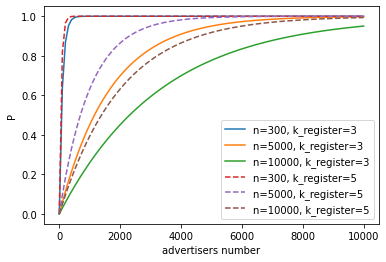

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot()

ax.set_xlabel("advertisers number")
ax.set_ylabel("P")
linestyles = ['solid', 'dashed', 'dotted']
x = np.linspace(0,10000,100)
counter = 0
for k_register in [3, 5]:
    for registrar_num in [300, 5000, 10000]:
        y = 1-(1 - (k_register/registrar_num))**x
        plt.plot(x, y, linestyle = linestyles[counter%2], label='n='+str(registrar_num)+", k_register=" +str(k_register))
    counter += 1
ax.legend()
plt.show()

## Probability that a searcher finds an ad advertised by x advertisers
* `k_lookup` - number of lookups per bucket sent by each searcher

Each searcher sends `k_lookup` lookups to different registrars per bucket. We want to calculate a probability that after sending those lookups, the node will encounter at least one registrar will have an ad that interest the searcher. 

From the previous section, we know that when sending a single lookup request, the chance of finding an ad would be: `1 - (1 - k_register/registrar_num)^x`

Thus a chance of NOT finding an with a single lookup add would be: `1 - (1 - (1 - k_register/registrar_num)^x)`

Finally, a chance of finding at least one ad with `k_lookup` lookups would be: `1 - (1 - (1 - (1 - k_register/registrar_num)^x))^k_lookup`




Probability of finding at least one regisrations in a bucket


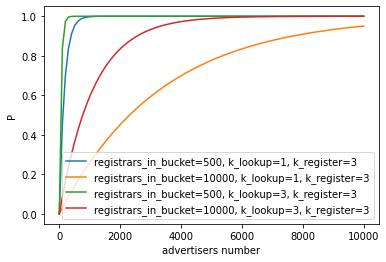

In [11]:
print("Probability of finding at least one regisrations in a bucket")

fig = plt.figure()
ax = fig.add_subplot()
x = np.linspace(0,10000,100)

ax.set_xlabel("advertisers number")
ax.set_ylabel("P")

k_lookup = 3
k_register = 3


for k_lookup in [1, 3]:
    for k_register in [3]:
        for registrar_num in [500, 10000]:
            x = np.linspace(0,10000,100)
            p_succ = 1-(1 - (k_register/registrar_num))**x
            p_fail = 1 - p_succ
            p = 1 - p_fail**k_lookup
            plt.plot(x, p, label='registrars_in_bucket=' + str(registrar_num) + ', k_lookup='+str(k_lookup)+", k_register=" +str(k_register))

ax.legend()
plt.show()

## TODOs

* We could introduce malicious registrars in the equation that even when selected, don't return any benign results later on
* We could also calculate a probability of being eclipse (encountering only malicious nodes or nodes having no ads of interest)
* Shall we provide metric not only for a single bucket, but "after traversing x buckets"?
* Does it make sense to put advertisers number in the x-axis? or maybe we can use the number of registrars in the x-axis?

# Number of ads placed by an adversary

* when an attacker send multiple registration requests `x`, only a part of them `d` will be in the table at the same time. This amount can be calculated by `x/(1+ w_time())`, where `w_time()` is an average waiting time the node receives for its requests. 

* However, the average returned waiting time, increases as more and more attacker's ads make it to the table. The system reaches an equilibrium, when the number of ads in the table yields an average waiting time high enough to prevent additional registration `d = x/(1+ w_time())`. 

* We consider a spam attack (the most severe one), where each attacker's ad is for a different topic. We also assume that the attacker is able to generate a seperate ID for each ad. In such a case, the waiting time will be given by `ip_score/(1-d/n)^10`, where `ip_score` is the average IP Score received by the attacker ranging from 0 to 1. For instance, an attacker using only one IP address, will have `ip_score = 1`. 

* By numerically solving the equation `d = x/(1+ ip_score/(1-d/n)^10)`, we can give the maximum number of ads placed by an attacker as a function of parallel attempts `x`. 


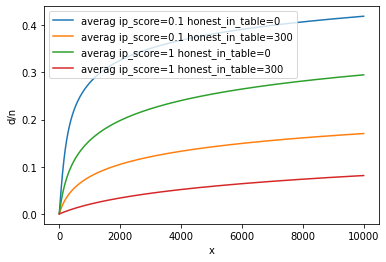

In [12]:
#!/usr/bin/python

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the expression whose roots we want to find
n = 1000
fig = plt.figure()
ax = fig.add_subplot()


for ip_score in [0.1, 1]:
    for honest_in_table in [0, 300]:
        x_vals = []
        y_vals = []
        for x in range(1, 10000):
            func = lambda d: x/(1+ (ip_score)*1/(1-(d + honest_in_table)/n)**10) - (d)
            d = np.linspace(0, 300, 300)

            # Use the numerical solver to find the roots
            d_initial_guess = 10
            d_solution = fsolve(func, d_initial_guess)

            x_vals.append(x)
            y_vals.append(d_solution/n)
        ax.plot(x_vals, y_vals, label='averag ip_score=' + str(ip_score) + " honest_in_table=" + str(honest_in_table))

plt.ylabel("d/n")
plt.xlabel("x")
plt.legend()
plt.show()


# Probability of retrieving a malicious ad from an honest registrar

* when an attacker send multiple registration requests `x_a`, only a part of them `d_a` will be in the table at the same time. This amount can be calculated by `d_a = x_a/(1+ w_a_time())`, where `w_a_time()` is an average waiting time the attacker receives for its requests. 

* when honests advertisers send multiple registration requests `x_h`, only a part of them `d_h` will be in the table at the same time. This amount can be calculated by `x_h/(1+ w_h_time())`, where `w_h_time()` is an average waiting time the attacker receives for its requests. 

* The average returned waiting time, increases as more and more ads (both malicious and honests) make it to the table. The system reaches an equilibrium, when the number of ads in the table yields an average waiting time high enough to prevent additional registration `d_a = x_a/(1+ w_a_time())` and `d_h = x_h/(1+ w_h_time()`. 

* We consider a single topic attack, where each attacker's ad is for the same topic. We also assume that the attacker is able to generate a seperate ID for each ad. 

* We assume that there are `o` other requests in the table that are for different topics. 

* For malicious requests, the waiting time will be given by `w_a_time() = (topic_score + ip_a_score)/(1-(d_a + d_h + o)/n)^P_occ`, where `ip_a_score` is the average IP Score received by the attacker ranging from 0 to 1, and `topic_score` is the average topic score received by the attacker. For instance, an attacker using only one IP address, will have `ip_score = 1`. 

* For honest requests, the waiting time will be given by `w_h_time() = (topic_score + ip_h_score)/(1-(d_a + d_h + o)/n)^P_occ`, where `ip_h_score` is the average IP Score received by the honest nodes ranging from 0 to 1, and `topic_score` is the average topic score received by the honest advertisers (same as malicious nodes).

* the topic score is given by `topic_score = ((d_a + d_h)/(d_a + d_h +o))^P_topic`

* We can assume a fixed malicious to honest ratio `r = x_a/x_h`, so that `x_a = r*x_h`. 

* We can assume a fixed malicious to honest ip_score ratio `r_ip = ip_a_score / ip_h_score < 1`, so that `ip_a_score = r_ip * ip_h_score`.

* `d_a = x_h*r/(1+ w_a_time()) = x_h*r/(1 + (((d_a + d_h)/(d_a + d_h +o))^P_topic + ip_h_score * r_ip)/(1-(d_a + d_h)/n)^P_occ`

* `d_h = x_h/(1+ w_h_time()) = x_h/(1 + (((d_a + d_h)/(d_a + d_h + o))^P_topic + ip_h_score)/(1-(d_a + d_h)/n)^P_occ`

* We can numerically solve two equations.  

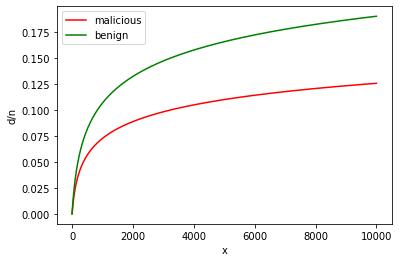

In [13]:
#!/usr/bin/python

## The code below is currently not working

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

#constants
P_occ = 10
P_topic = 1
r = 1
r_ip = 5
ip_h_score = 0.15
o = 0
#x_h = 100


def func(var):
    d_a = var[0]
    d_h = var[1]
    
    f = np.zeros(2)
    f[0] = (x_h*r) / (1 + (((d_a + d_h)/(d_a + d_h +o))**P_topic + ip_h_score * r_ip)/(1-(d_a + d_h)/n)**P_occ) - d_a
    f[1] = x_h / (1 + (((d_a + d_h)/(d_a + d_h + o))**P_topic + ip_h_score)/(1-(d_a + d_h)/n)**P_occ) - d_h
    return f



# Define the expression whose roots we want to find
n = 1000
fig = plt.figure()
ax = fig.add_subplot()


x_vals = []
da_vals = []
dh_vals = []
for x_h in range(1, 10000):
    # Use the numerical solver to find the roots
    d_initial_guess = (10, 10)
    d_solution = fsolve(func, d_initial_guess)
    x_vals.append(x_h)
    da_vals.append(d_solution[0]/n)
    dh_vals.append(d_solution[1]/n)
ax.plot(x_vals, da_vals, label='malicious', color='red')
ax.plot(x_vals, dh_vals, label='benign', color='green')

plt.ylabel("d/n")
plt.xlabel("x_n")
plt.legend()
plt.show()